# Eliminación de fondo mediante Binarización y máscaras

En esta práctica aprenderemos a separar el objeto principal de un fondo uniforme usando técnicas de binarización usando herramientas de OpenCV.

En esta práctica, cargaremos imágenes con un objeto sobre fondo uniforme, convertiremos la imagen a escala de grises, aplicaremos un umbral (threshold) para generar una máscara binaria, y usaremos dicha máscara para extraer el objeto eliminando el fondo.

Vamos allá!

In [1]:
# Cargamos las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt

Para esta práctica vamos usar una imagen de una manzana con fondo blanco. Esta imagen resulta conveniente por tener un objeto grande, en primer plano, y con un color distinto al del fondo; además el fondo blanco ayuda mucho en estos casos.

Dentro de la carpeta hay varias imágenes con una estructura similar aunque de distintos objetos. Una vez realizado el ejemplo, pueden experimentar con los valores, imagenes, técnicas, etc.

Vamos a cargar la imagen desde disco.

In [14]:
# Leer la imagen
image = cv2.imread('toy-car.jpg')
# Convertir la imagen de BGR a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Ahora convertimos la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [22]:
# Aplicamos un thresholding global
# Ajusten los valores dependiendo la imagen
_, mask = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Por si quieren hacer un ajuste fino en la mascara
# También pueden ajustar los valores según la imagen y el objeto con el que trabajen
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)

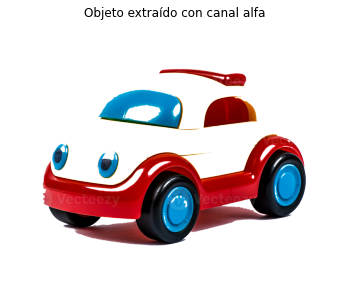

In [24]:
# CANAL 6 CORREGIDO: Extraer objeto sobre fondo transparente

# 1) Separar canales B, G, R
b, g, r = cv2.split(image)

# 2) La máscara debe ser de 0–255 (alfa)
#    Si tu máscara está invertida, asegúrate de usar THRESH_BINARY, no THRESH_BINARY_INV
#    o invierte con cv2.bitwise_not(mask) antes de este paso.

# 3) Fusionar sin 'axis'
result = cv2.merge([b, g, r, mask])

# 4) Si prefieres con NumPy:
# result = np.dstack((img, mask))

# 5) Mostrar
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.title("Objeto extraído con canal alfa")
plt.show()


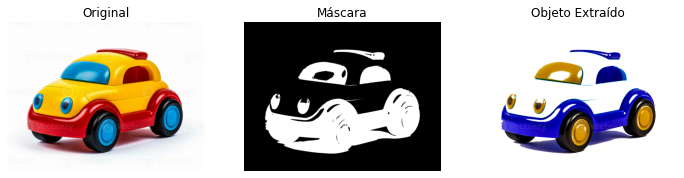

In [25]:
# Visualizamos los resultados
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(image_rgb);            axes[0].set_title("Original")
axes[1].imshow(mask, cmap="gray");  axes[1].set_title("Máscara")
axes[2].imshow(result);             axes[2].set_title("Objeto Extraído")
for ax in axes: ax.axis("off")
plt.show()


# Ejercicios adicionales
1) Probar diferentes valores de umbra ($50, 100, 150,...$) y comparar resultados.
2) Reemplazar el método de binarización con `cv2.THRESH_BINARY` y observar las diferencias
3) Aplicar una umbralización adaptativa con el método `cv2.adaptiveThreshold` y analizar si hay mejoría en los resultados.